In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as map

In [6]:
import pandas as pd

df = pd.read_csv("../data/data_clean.csv")

sample = pd.read_csv("../data/sample_submission.csv")
df = df.dropna(subset=['YearRemodAdd', 'Heating'])
df.shape
                     #cincat

(2919, 81)

In [7]:
# TODO: View the first 5 rows of your data
df.head()
...

Ellipsis

In [11]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [12]:
df.dropna(inplace=True)

In [13]:

print(df[['YearRemodAdd', 'Heating']].isnull().sum())

YearRemodAdd    0
Heating         0
dtype: int64


In [16]:
# Add 'YearRemodAdd' and 'Heating' columns from df to sample, and encode 'Heating'
import pandas as pd

# Load sample and test data
sample = pd.read_csv("../data/sample_submission.csv")
test = pd.read_csv("../data/test.csv")

# Merge 'YearRemodAdd' and 'Heating' from test into sample using 'Id'
sample = sample.merge(test[['Id', 'YearRemodAdd', 'Heating']], on='Id', how='left')

# Encode 'Heating'
df = sample[['Id', 'YearRemodAdd', 'Heating']]


Crosstab of YearRemodAdd and Heating (last 10 years):
Heating       GasA  GasW  Grav  Wall
YearRemodAdd                        
2001            28     0     0     0
2002            34     0     0     0
2003            47     1     0     0
2004            49     0     0     0
2005            67     1     0     0
2006           105     0     0     0
2007            88     0     0     0
2008            41     0     0     0
2009            11     0     0     0
2010             7     0     0     0


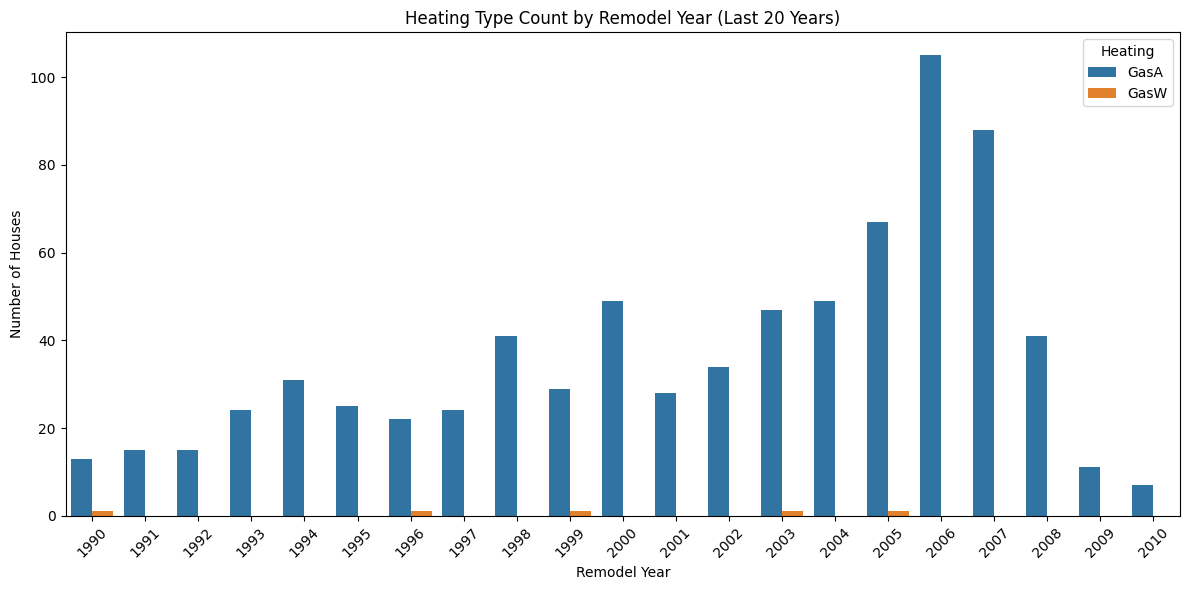

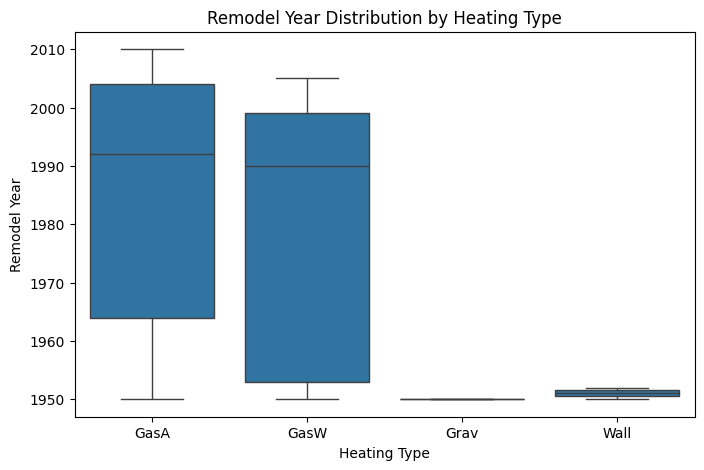

In [17]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# Load sample and test data
sample = pd.read_csv("../data/sample_submission.csv")

test = pd.read_csv("../data/test.csv")

# Merge sample and test data
sample = sample.merge(test[['Id', 'YearRemodAdd', 'Heating']], on='Id', how='left')

# Encode Heating with id numbers
sample['Heating_code'] = sample['Heating'].map({'GasA': 1, 'GasW': 2, 'Grav': 3, 'Wall': 4, 'OthW': 5, 'Floor': 6})

# Crosstab: Shows how many houses have each heating type in each remodel year (last 10 years)
print("Crosstab of YearRemodAdd and Heating (last 10 years):")

print(pd.crosstab(sample['YearRemodAdd'], sample['Heating']).tail(10))

# Bar plot: Shows the count of each heating type for the last 20 remodel years
recent = sample[sample['YearRemodAdd'] >= (sample['YearRemodAdd'].max() - 20)]

plt.figure(figsize=(12, 6))

sns.countplot(data=recent, x='YearRemodAdd', hue='Heating')

plt.title('Heating Type Count by Remodel Year (Last 20 Years)')

plt.xlabel('Remodel Year')

plt.ylabel('Number of Houses')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

# Box plot: Shows the distribution of remodel years for each heating type
plt.figure(figsize=(8, 5))

sns.boxplot(x='Heating', y='YearRemodAdd', data=sample)

plt.title('Remodel Year Distribution by Heating Type')

plt.xlabel('Heating Type')

plt.ylabel('Remodel Year')

plt.show()